In [1]:
!pwd

/Users/leoxu/codeground/MAS/component_analysis


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("data/github_repos_raw.csv")

#data.head()
len(data)

2379

In [4]:
# filter out tutorials, awesome lists, and resources
exclude_terms = ["tutorial", "awesome", "list", "resource", "awesome-list", "books", "course", "education"]
pattern = "|".join(exclude_terms)
data = data[~data["topics"].str.contains(pattern, case=False, na=False)]
len(data)

2011

In [5]:
# filter out projects that are frameworks or tools to build multi-agent systems
exclude_terms = ["framework", "tool", "collection"]
pattern = "|".join(exclude_terms)
data = data[~data["description"].str.contains(pattern, case=False, na=False)]
len(data)

1569

In [ ]:
# len(data)
# # save the filtered data
# data.to_csv("data/github_repos_filtered.csv", index=False)

2011

In [7]:
import matplotlib.pyplot as plt

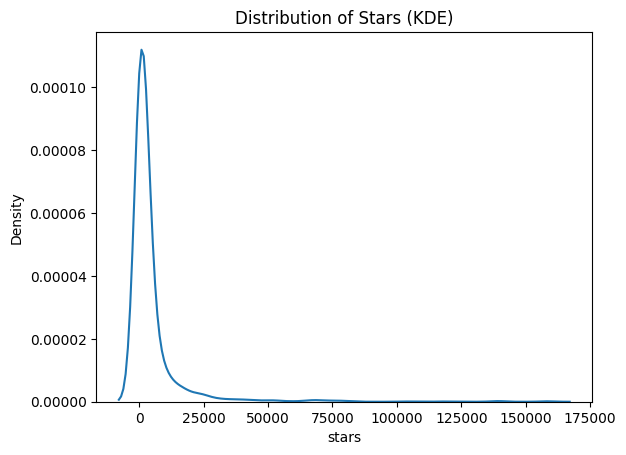

In [16]:
# plot the distribution of the number of stars
import seaborn as sns

# Plot KDE (Kernel Density Estimate) for a smooth line of distribution
plt.figure()
sns.kdeplot(data['stars'])
#plt.yscale('log')
plt.title('Distribution of Stars (KDE)')
plt.show()


In [6]:
# compute IQR
q1 = data['stars'].quantile(0.25)
q3 = data['stars'].quantile(0.75)
iqr = q3 - q1
print(f"IQR: {iqr}")



IQR: 3193.0


In [7]:
# compute outliers
outliers =data[data['stars'] > q3 + 1.5 * iqr]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 194


In [8]:
# filter out outliers
data_no_outliers =data[data['stars'] <= q3 + 1.5 * iqr]
len(data_no_outliers)

1375

In [9]:
# save the filtered data
data_no_outliers.to_csv("data/github_repos_no_outliers.csv", index=False)
